# Part One: Identifying at-risk Counties

## Stetting up data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### start with county physicans data

In [2]:
data = pd.read_csv('export.csv')

In [3]:
data.head()

,Unnamed: 0,FIPS,state,county,primary_care_physicians,population,urban,supply,shadac_category,unemployment_rate
0,0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,4.9
1,1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,5.2
2,2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6.2
3,3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,7.2
4,4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,4.6


In [4]:
#add in physicans per 100k of people
data['pcp_per_100k'] = data['primary_care_physicians'] / data['population'] * 100000

### now add in annual wellness info

In [5]:
annual_wellness = pd.read_csv('annual_wellness.csv')

In [6]:
annual_wellness.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"1,000-4,999",29
1,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",29
2,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,"1,000-4,999",21
3,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,"1,000-4,999",39
4,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,"1,000-4,999",37


In [7]:
#Keep only tennessee data
wellness = annual_wellness.loc[annual_wellness['state'] == 'TENNESSEE']

In [8]:
wellness = wellness[['fips', 'analysis_value']]

In [9]:
wellness = wellness.rename(columns = {'analysis_value': '%_medicareBen_Wellness_vist'})

In [10]:
wellness.head()

,fips,%_medicareBen_Wellness_vist
2428,47001,35
2429,47003,46
2430,47005,30
2431,47007,19
2432,47009,43


In [11]:
wellness = wellness.rename(columns = {'fips': 'FIPS'})

In [12]:
#merge with physicans/urban/unemployment data
data = data.merge(wellness, on='FIPS')

In [13]:
data.head()

,Unnamed: 0,FIPS,state,county,primary_care_physicians,population,urban,supply,shadac_category,unemployment_rate,pcp_per_100k,%_medicareBen_Wellness_vist
0,0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,4.9,51.274635,35
1,1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,5.2,31.061045,46
2,2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6.2,18.587361,30
3,3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,7.2,6.740361,19
4,4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,4.6,69.269667,43


### Now add in hospitalizations

In [14]:
hospitalizations = pd.read_csv('hospitalizations.csv')

In [15]:
hospitalizations.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"5,000-9,999",299
1,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",268
2,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,"1,000-4,999",329
3,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,"1,000-4,999",355
4,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,"1,000-4,999",301


In [16]:
#Keep only tennessee data
hospitalizations = hospitalizations.loc[hospitalizations['state'] == 'TENNESSEE']

In [17]:
#keep only info columns
hospitalizations = hospitalizations[['fips', 'analysis_value']]

In [18]:
hospitalizations = hospitalizations.rename(columns = {'analysis_value': 'hosp_per_1000_ben'})

In [19]:
hospitalizations = hospitalizations.rename(columns = {'fips': 'FIPS'})

In [20]:
data = data.merge(hospitalizations, on='FIPS')

In [21]:
data.head()

,Unnamed: 0,FIPS,state,county,primary_care_physicians,population,urban,supply,shadac_category,unemployment_rate,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben
0,0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,4.9,51.274635,35,267
1,1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,5.2,31.061045,46,271
2,2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6.2,18.587361,30,274
3,3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,7.2,6.740361,19,313
4,4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,4.6,69.269667,43,267


### Add in emergency_department.csv

In [22]:
emergency_visits = pd.read_csv('emergency_department.csv')

In [23]:
emergency_visits.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,undefined,723
1,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,undefined,601
2,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,undefined,929
3,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,undefined,787
4,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,undefined,714


In [24]:
#Keep only tennessee data
emergency_visits = emergency_visits.loc[emergency_visits['state'] == 'TENNESSEE']

In [25]:
#keep only info columns
emergency_visits = emergency_visits[['fips', 'analysis_value']]

In [26]:
emergency_visits = emergency_visits.rename(columns = {'analysis_value': 'ER_per_1000_ben'})

In [27]:
emergency_visits = emergency_visits.rename(columns = {'fips': 'FIPS'})

In [28]:
data = data.merge(emergency_visits, on='FIPS')

In [29]:
data.head()

,Unnamed: 0,FIPS,state,county,primary_care_physicians,population,urban,supply,shadac_category,unemployment_rate,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben,ER_per_1000_ben
0,0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,4.9,51.274635,35,267,617
1,1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,5.2,31.061045,46,271,646
2,2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6.2,18.587361,30,274,783
3,3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,7.2,6.740361,19,313,750
4,4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,4.6,69.269667,43,267,581


### Finally add hosptial closures

In [30]:
closures = pd.read_excel('Closures-Database-for-web.xlsx')

In [31]:
closures.head()

,Count,Hospital,Address,City,State,Zip,RUCA,CBSA,Medicare Payment,# of Beds,Closure Month,Closure Year
0,181,MercyOne Oakland Medical Center,601 East Second Street,Oakland,NE,68045,10.0,Neither,CAH,16,July,2021
1,180,Community HealthCare System- St. Marys,206 Grand Ave,St. Marys,KS,66536,7.0,Metro,CAH,25,June,2021
2,179,Jellico Medical Center,188 HOSPITAL LANE,JELLICO,TN,37762,10.0,Metro,PPS,54,November,2020
3,178,Perry Community Hospital,2718 Squirrel Hollow Drive,Linden,TN,37096,10.0,Neither,PPS,25,November,2020
4,177,Northridge Medical Center,70 Medical Center Dr,Commerce,GA,30529,7.0,Micro,PPS,27,October,2020


In [32]:
data.to_csv('AllData.csv')

## Now look for most at risk communities

In [33]:
data.sort_values('pcp_per_100k').head(10)

,Unnamed: 0,FIPS,state,county,primary_care_physicians,population,urban,supply,shadac_category,unemployment_rate,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben,ER_per_1000_ben
47,47,47095,Tennessee,Lake,0.0,7401,Rural,inf,low inadequate,9.3,0.000000,20,401,1000
30,30,47061,Tennessee,Grundy,0.0,13344,Rural,inf,low inadequate,6.5,0.000000,34,285,651
87,87,47175,Tennessee,Van Buren,0.0,5760,Rural,inf,low inadequate,6.8,0.000000,31,304,759
16,16,47033,Tennessee,Crockett,0.0,14399,Rural,inf,low inadequate,5.0,0.000000,25,289,622
3,3,47007,Tennessee,Bledsoe,1.0,14836,Rural,1.483600e+04,low inadequate,7.2,6.740361,19,313,750
80,80,47161,Tennessee,Stewart,1.0,13427,Urban,1.342700e+04,low inadequate,5.6,7.447680,39,278,596
48,48,47097,Tennessee,Lauderdale,2.0,25989,Rural,1.299450e+04,low inadequate,6.8,7.695564,36,294,822
64,64,47129,Tennessee,Morgan,3.0,21545,Rural,7.181667e+03,low inadequate,5.8,13.924344,23,263,636
58,58,47117,Tennessee,Marshall,5.0,32965,Rural,6.593000e+03,low inadequate,4.8,15.167602,20,268,706
33,33,47067,Tennessee,Hancock,1.0,6587,Rural,6.587000e+03,low inadequate,6.7,15.181418,27,300,917


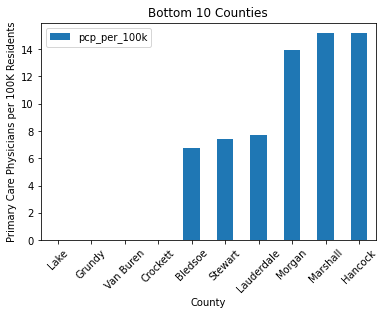

In [34]:
bottom = data.sort_values('pcp_per_100k').head(10)
bottom.plot(kind = 'bar',x = 'county', y = 'pcp_per_100k')
##data.sort_values('pcp_per_100k').head(10).plot.bar(x='county', y='pcp_per_100k', rot=0)
plt.xticks(rotation = 45)
plt.xlabel('County')
plt.ylabel('Primary Care Physicians per 100K Residents')
plt.title('Bottom 10 Counties')
plt.show()

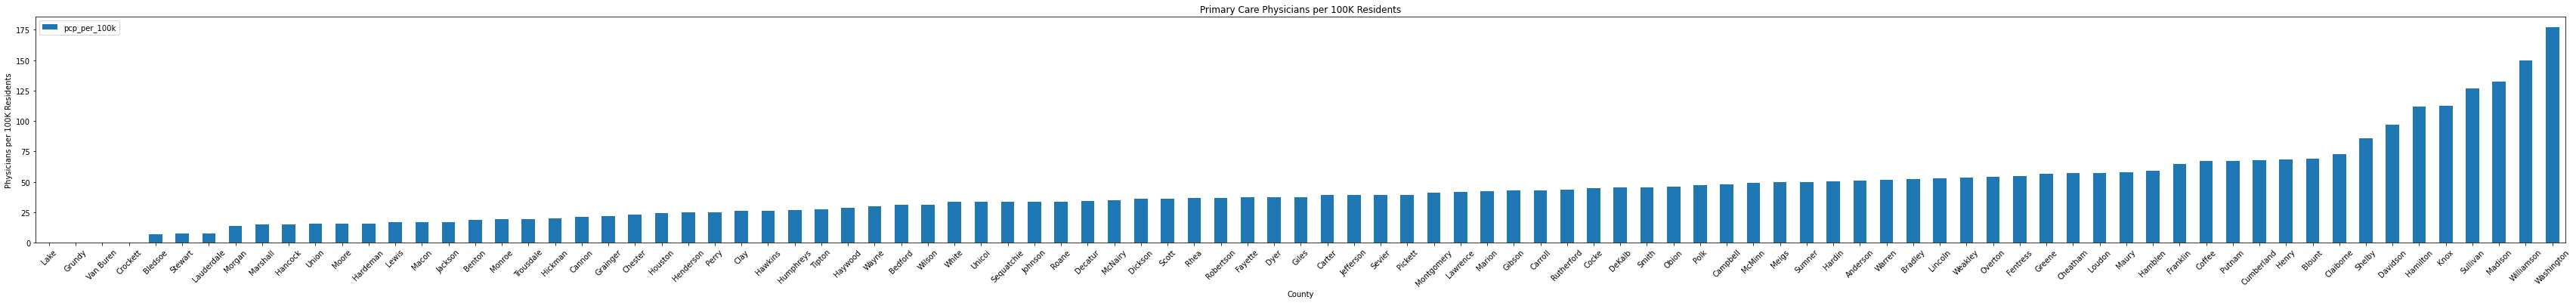

In [46]:

data = data.sort_values('pcp_per_100k')
data.plot(kind = 'bar',x = 'county', y = 'pcp_per_100k')
plt.rcParams["figure.figsize"] = (60,5.5)
plt.xticks(rotation = 45)
plt.xlabel('County')
plt.ylabel('Physicians per 100K Residents')
plt.title('Primary Care Physicians per 100K Residents')
plt.show()

## Lake, Grundy, Van Buren, Crokkett counties are all at risk and are rural counties and have high unemployment rates, have 0 to no primary care physicans, and almost no doctors at all. 

In [37]:
data.sort_values('unemployment_rate').tail(10)

,Unnamed: 0,FIPS,state,county,primary_care_physicians,population,urban,supply,shadac_category,unemployment_rate,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben,ER_per_1000_ben
14,14,47029,Tennessee,Cocke,16.0,35552,Rural,2.222000e+03,moderately inadequate,6.8,45.004500,35,229,734
19,19,47039,Tennessee,Decatur,4.0,11686,Rural,2.921500e+03,moderately inadequate,7.0,34.228992,13,332,832
78,78,47157,Tennessee,Shelby,806.0,936374,Urban,1.161754e+03,adequate,7.0,86.076717,34,304,695
85,85,47171,Tennessee,Unicoi,6.0,17811,Urban,2.968500e+03,moderately inadequate,7.1,33.687047,38,311,727
41,41,47083,Tennessee,Houston,2.0,8164,Rural,4.082000e+03,low inadequate,7.2,24.497795,39,304,691
3,3,47007,Tennessee,Bledsoe,1.0,14836,Rural,1.483600e+04,low inadequate,7.2,6.740361,19,313,750
54,54,47109,Tennessee,McNairy,9.0,25844,Rural,2.871556e+03,moderately inadequate,7.3,34.824331,40,273,660
34,34,47069,Tennessee,Hardeman,4.0,25443,Rural,6.360750e+03,low inadequate,7.3,15.721416,22,271,748
67,67,47135,Tennessee,Perry,2.0,7962,Rural,3.981000e+03,low inadequate,7.8,25.119317,23,351,788
47,47,47095,Tennessee,Lake,0.0,7401,Rural,inf,low inadequate,9.3,0.000000,20,401,1000


# Second, TN Med Helper is interested in reducing the number of potentially preventable hospitalizations. Do areas that lack access to healthcare tend to have higher rates of emergency department visits or hospitalizations? Is there an association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits? 

In [38]:
data_refinded = data[['county', 'primary_care_physicians', 'pcp_per_100k', '%_medicareBen_Wellness_vist', 'hosp_per_1000_ben', 'ER_per_1000_ben']]

In [39]:
#look at counties with high hospitalizations
data_refinded.sort_values('hosp_per_1000_ben').tail(10)

,county,primary_care_physicians,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben,ER_per_1000_ben
42,Humphreys,5.0,27.122322,16,329,772
19,Decatur,4.0,34.228992,13,332,832
13,Clay,2.0,26.130128,30,332,699
67,Perry,2.0,25.119317,23,351,788
79,Smith,9.0,45.592705,25,358,719
43,Jackson,2.0,17.120356,25,360,682
66,Overton,12.0,54.377379,37,361,689
55,Macon,4.0,16.777116,24,378,757
47,Lake,0.0,0.000000,20,401,1000
84,Trousdale,2.0,19.548431,24,425,946


In [40]:
# look at counties with high ER visits
data_refinded.sort_values('ER_per_1000_ben').tail(10)

,county,primary_care_physicians,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben,ER_per_1000_ben
65,Obion,14.0,46.105714,16,319,778
2,Benton,3.0,18.587361,30,274,783
67,Perry,2.0,25.119317,23,351,788
38,Henderson,7.0,25.020553,27,256,795
48,Lauderdale,2.0,7.695564,36,294,822
19,Decatur,4.0,34.228992,13,332,832
22,Dyer,14.0,37.417148,29,325,854
33,Hancock,1.0,15.181418,27,300,917
84,Trousdale,2.0,19.548431,24,425,946
47,Lake,0.0,0.000000,20,401,1000


In [41]:
#look at counties that had more wellness visits
data_refinded.sort_values('%_medicareBen_Wellness_vist').tail(10)

,county,primary_care_physicians,pcp_per_100k,%_medicareBen_Wellness_vist,hosp_per_1000_ben,ER_per_1000_ben
86,Union,3.0,15.394089,46,240,561
1,Bedford,15.0,31.061045,46,271,646
93,Williamson,338.0,149.962953,48,201,469
7,Cannon,3.0,21.159543,49,247,596
52,Loudon,30.0,57.317539,49,227,542
29,Greene,39.0,56.658047,50,252,652
44,Jefferson,21.0,39.121444,51,240,606
81,Sullivan,199.0,126.711238,52,261,584
46,Knox,520.0,112.772823,56,234,559
89,Washington,226.0,176.831892,57,256,504


In [42]:
data_refinded.groupby('pcp_per_100k')['hosp_per_1000_ben'].describe()

,count,mean,std,min,25%,50%,75%,max
pcp_per_100k,,,,,,,,
0.000000,4.0,319.75,54.780623,285.0,288.0,296.5,328.25,401.0
6.740361,1.0,313.00,NaN,313.0,313.0,313.0,313.00,313.0
7.447680,1.0,278.00,NaN,278.0,278.0,278.0,278.00,278.0
7.695564,1.0,294.00,NaN,294.0,294.0,294.0,294.00,294.0
13.924344,1.0,263.00,NaN,263.0,263.0,263.0,263.00,263.0
...,...,...,...,...,...,...,...,...
112.772823,1.0,234.00,NaN,234.0,234.0,234.0,234.00,234.0
126.711238,1.0,261.00,NaN,261.0,261.0,261.0,261.00,261.0
132.138284,1.0,255.00,NaN,255.0,255.0,255.0,255.00,255.0


In [43]:
data_refinded.groupby('pcp_per_100k')['ER_per_1000_ben'].describe()

,count,mean,std,min,25%,50%,75%,max
pcp_per_100k,,,,,,,,
0.000000,4.0,758.0,171.765344,622.0,643.75,705.0,819.25,1000.0
6.740361,1.0,750.0,NaN,750.0,750.00,750.0,750.00,750.0
7.447680,1.0,596.0,NaN,596.0,596.00,596.0,596.00,596.0
7.695564,1.0,822.0,NaN,822.0,822.00,822.0,822.00,822.0
13.924344,1.0,636.0,NaN,636.0,636.00,636.0,636.00,636.0
...,...,...,...,...,...,...,...,...
112.772823,1.0,559.0,NaN,559.0,559.00,559.0,559.00,559.0
126.711238,1.0,584.0,NaN,584.0,584.00,584.0,584.00,584.0
132.138284,1.0,666.0,NaN,666.0,666.00,666.0,666.00,666.0


## Less access to doctors does lead to an increase in hospitalizations and ER visits

In [44]:
data_refinded.groupby('%_medicareBen_Wellness_vist')['ER_per_1000_ben'].describe()

,count,mean,std,min,25%,50%,75%,max
%_medicareBen_Wellness_vist,,,,,,,,
12,1.0,608.000000,NaN,608.0,608.00,608.0,608.00,608.0
13,1.0,832.000000,NaN,832.0,832.00,832.0,832.00,832.0
15,1.0,706.000000,NaN,706.0,706.00,706.0,706.00,706.0
16,2.0,775.000000,4.242641,772.0,773.50,775.0,776.50,778.0
17,1.0,700.000000,NaN,700.0,700.00,700.0,700.00,700.0
18,1.0,600.000000,NaN,600.0,600.00,600.0,600.00,600.0
19,1.0,750.000000,NaN,750.0,750.00,750.0,750.00,750.0
20,3.0,783.666667,189.816578,645.0,675.50,706.0,853.00,1000.0
22,2.0,707.500000,57.275649,667.0,687.25,707.5,727.75,748.0


In [45]:
data_refinded.groupby('%_medicareBen_Wellness_vist')['hosp_per_1000_ben'].describe()

,count,mean,std,min,25%,50%,75%,max
%_medicareBen_Wellness_vist,,,,,,,,
12,1.0,309.000000,NaN,309.0,309.00,309.0,309.00,309.0
13,1.0,332.000000,NaN,332.0,332.00,332.0,332.00,332.0
15,1.0,296.000000,NaN,296.0,296.00,296.0,296.00,296.0
16,2.0,324.000000,7.071068,319.0,321.50,324.0,326.50,329.0
17,1.0,303.000000,NaN,303.0,303.00,303.0,303.00,303.0
18,1.0,266.000000,NaN,266.0,266.00,266.0,266.00,266.0
19,1.0,313.000000,NaN,313.0,313.00,313.0,313.00,313.0
20,3.0,323.000000,69.419018,268.0,284.00,300.0,350.50,401.0
22,2.0,258.500000,17.677670,246.0,252.25,258.5,264.75,271.0


## Looks like if there was a higher % of bens that went to annual wellness visits there was lower hospitalizations and ER visits